In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Request

url = 'https://api-te5jtpgwkq-ew.a.run.app/predict'
params = {
    'station_id':'061292',
    'predict_length':12,
}

response = requests.get(url,params=params)

In [70]:
# Dictionaries from the response

response_dict = response.json()

initial_dict = response_dict['initial']
forecast_dict = response_dict['forecast']
lower_dict = response_dict['lower']
upper_dict = response_dict['upper']

# Pandas Series from dictionaries

lower = pd.Series(lower_dict,index=lower_dict.keys())
upper = pd.Series(upper_dict,index=upper_dict.keys())
forecast = pd.Series(forecast_dict,index=forecast_dict.keys())
initial = pd.Series(initial_dict,index=initial_dict.keys())

# Index convertion to timestamp
lower.index = pd.to_datetime(lower.index)
upper.index = pd.to_datetime(upper.index)
forecast.index = pd.to_datetime(forecast.index)
initial.index = pd.to_datetime(initial.index)

# We keep only 36 month of the initial series
initial = initial[-36:]

# We add to forecast, lower and upper the last point of initial
# to join the two curves
lower = pd.concat([initial[-1:],lower])
upper = pd.concat([initial[-1:],upper])
forecast = pd.concat([initial[-1:],forecast])


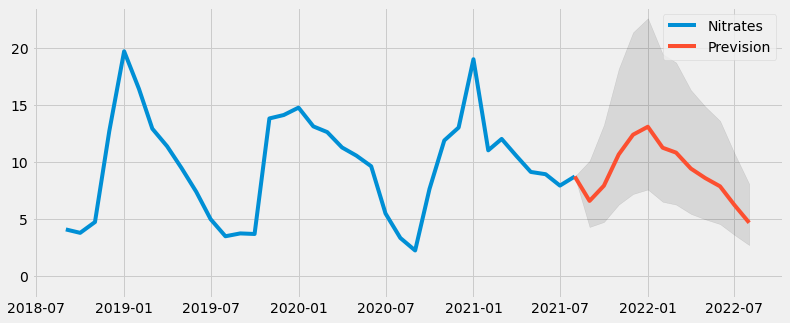

In [71]:
with plt.style.context('fivethirtyeight'):

    plt.figure(figsize=(12,5))
    plt.plot(initial,label='Nitrates')
    plt.plot(forecast,label='Prevision')
    plt.fill_between(lower.index,lower,upper,color='k',alpha=.10)
    
    
    
    plt.legend()
    plt.ylim(bottom=-2)
    plt.show()

In [1]:
4.8 ** 0.5

2.1908902300206643